<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns

In [127]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [128]:
df = df0.copy()

In [129]:
df.head()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58


In [130]:
df.groupby("status", dropna =False).mean(numeric_only=True)

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 748.0+ bytes


In [132]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [133]:
df.status.value_counts(dropna = False)

status
FT     4
PT     4
-      2
NaN    1
Name: count, dtype: int64

In [134]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

In [135]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [136]:
type(df.var1[3])

str

In [137]:
type(df.var2[1])

numpy.float64

In [138]:
type(df.salary[6])

NoneType

In [139]:
type(np.nan)

float

In [140]:
type(np.NaN)

float

In [141]:
a = np.nan
b = np.NaN

print(np.isnan(a))
print(np.isnan(b))

True
True


In [142]:
type(None)

NoneType

In [143]:
pd.Series([1, np.nan, np.NaN, 2, None])

0    1.0
1    NaN
2    NaN
3    2.0
4    NaN
dtype: float64

In [144]:
0 * np.nan

nan

In [145]:
np.nan - np.nan

nan

In [146]:
np.nan + np.nan

nan

In [147]:
np.nan - 10

nan

In [148]:
np.nan == np.nan

False

In [149]:
10 > np.nan

False

In [150]:
np.inf > np.nan

False

In [151]:
float("-inf") < np.nan < float("inf")

False

In [152]:
np.nan is np.nan

True

In [153]:
id(np.nan)

2344411826544

In [154]:
id(np.nan)

2344411826544

In [155]:
df.salary

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [156]:
type(df.salary[0])

float

In [157]:
type(df.salary[6])

NoneType

In [158]:
type(df.salary[1])

int

In [159]:
df.salary.dtype

dtype('O')

In [160]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [161]:
type(df.status[2])

str

In [162]:
type(df.status[10])

float

In [163]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [164]:
type(df.var1[3])

str

In [165]:
type(df.var1[10])
#type(df.var1.iloc[-1])

str

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [166]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [167]:
# df.isnull()

df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [168]:
pd.isnull == pd.isna

True

In [169]:
print(id(pd.isnull))
print(id(pd.isna))

2344421550304
2344421550304


In [170]:
df.notnull()

#df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [171]:
df.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [172]:
df.isnull().any(axis = 1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [173]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [174]:
df.isnull().sum().sum()

9

In [175]:
df.salary.isnull().sum()

3

In [176]:
round(df.isnull().sum()/len(df)*100, 2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [177]:
df.isnull().sum() / df.shape[0] * 100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [178]:
df.isnull().mean(numeric_only=True) * 100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [179]:
df["salary"].isnull().mean(numeric_only=True) * 100

27.27272727272727

In [180]:
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [181]:
df[~df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [182]:
df[df.isnull().all(axis=1)]

,id,gender,status,dept,var1,var2,salary


In [183]:
#df[df.isnull().all(axis=1)]
df.loc[df.isnull().all(axis=1)]

,id,gender,status,dept,var1,var2,salary


In [184]:
df.loc[df.salary.isnull()]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [185]:
# to examine rows having missing value for specific column

#df[df.salary.isnull()]
df.loc[df.salary.isnull()]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [186]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [187]:
df[df.dept.isnull()]

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [188]:
df.loc[df.dept == "FS"]

,id,gender,status,dept,var1,var2,salary
1,P002,F,PT,FS,3,NaN,54
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136


In [189]:
df.loc[df.dept.isnull()]

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [190]:
df.loc[df.dept.isnull(), ["salary", "dept"]]

,salary,dept
5,75,None
8,60,NaN


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [191]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [192]:
df["var1"].map({"-" : np.nan})

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [193]:
text = "cl-rusw-y"

In [194]:
text.replace("-", "a")

'clarusway'

In [195]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [196]:
df.var1.replace(to_replace = "-", value = np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [197]:
type(df["var1"][9])

str

In [198]:
df["var1"].replace("-", np.nan).astype("float")
#df["var1"].replace(["-", "nan"], np.nan)

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [199]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [200]:
df["var1"].replace(["-", "nan"], value = np.nan, inplace=True)

In [201]:
df.var1 = df["var1"].astype("float")

In [202]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [203]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [204]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [205]:
df["gender"].map({"M" : 0, "F" : 1})

# df["gender"].replace(["F", "M"], [1, 0])

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [206]:
df.gender

0     M
1     F
2     M
3     F
4     M
5     F
6     M
7     F
8     M
9     F
10    M
Name: gender, dtype: object

In [207]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

In [208]:
df0.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [209]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [210]:
# it removes the rows which contains any (at least one missing value) missing value

df.dropna(axis=0, how="any", inplace=False)

#how : {'any','all'}, default 'any', Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
#inplace : bool, default False, If True, do operation inplace and return None.
#thresh : Require that many non-NA values.

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [211]:
# it removes the columns which contains any (at least one missing value) missing value

df.dropna(axis=1, how="any", inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [212]:
df.dropna(axis = 1, how = "all", inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [213]:
# let's create a column containing full of missing value

df["delete_me"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [214]:
df.dropna(axis = 1, how = "all", inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [215]:
help(df.dropna)

Help on method dropna in module pandas.core.frame:

dropna(*, axis: 'Axis' = 0, how: 'AnyAll | NoDefault' = <no_default>, thresh: 'int | NoDefault' = <no_default>, subset: 'IndexLabel' = None, inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        Pass tuple or list to drop on multiple axes.
        Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame

In [216]:
df.dropna(axis = 1, how = "all", inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [217]:
# Keep only the columns with at least 9 non-NA values.

df.dropna(axis = 1, thresh = 9, inplace = False)

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [218]:
df.drop([1, 3, 5])

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN
10,P011,M,NaN,AWS,6.0,9.0,NaN,NaN


In [219]:
# df.drop(["var1", "var2"]) # gives an error

df.drop(["var1", "var2"], axis = 1)

,id,gender,status,dept,salary,delete_me
0,P001,M,FT,DS,NaN,NaN
1,P002,F,PT,FS,54,NaN
2,P003,M,NaN,AWS,59,NaN
3,P004,F,FT,AWS,120,NaN
4,P005,M,PT,DS,58,NaN
5,P006,F,PT,None,75,NaN
6,P007,M,FT,FS,None,NaN
7,P008,F,NaN,FS,136,NaN
8,P009,M,PT,NaN,60,NaN
9,P010,F,FT,DS,125,NaN


In [220]:
df.drop(columns = ["var1", "var2"])

,id,gender,status,dept,salary,delete_me
0,P001,M,FT,DS,NaN,NaN
1,P002,F,PT,FS,54,NaN
2,P003,M,NaN,AWS,59,NaN
3,P004,F,FT,AWS,120,NaN
4,P005,M,PT,DS,58,NaN
5,P006,F,PT,None,75,NaN
6,P007,M,FT,FS,None,NaN
7,P008,F,NaN,FS,136,NaN
8,P009,M,PT,NaN,60,NaN
9,P010,F,FT,DS,125,NaN


 ## 2 - Filling Missing Values (Imputation)
 
 - fillna()
 - where()
 - interpolate()

In [221]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


 ### a.Filling with a specific value

In [222]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,0,0.0
1,P002,F,PT,FS,3.0,0.0,54,0.0
2,P003,M,0,AWS,5.0,5.0,59,0.0
3,P004,F,FT,AWS,0.0,8.0,120,0.0
4,P005,M,PT,DS,7.0,11.0,58,0.0
5,P006,F,PT,0,1.0,0.0,75,0.0
6,P007,M,FT,FS,0.0,0.0,0,0.0
7,P008,F,0,FS,10.0,2.0,136,0.0
8,P009,M,PT,0,14.0,3.0,60,0.0
9,P010,F,FT,DS,0.0,7.0,125,0.0


In [223]:
df["var1"].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 ### b.Filling with any Proper Value

In [224]:
df["var1"].mean()

6.0

In [225]:
df["var1"].fillna(df["var1"].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [226]:
df["var1"].fillna(df["var1"].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [227]:
df.mean(numeric_only=True)

var1         6.000
var2         6.625
delete_me      NaN
dtype: float64

In [228]:
df.drop("delete_me", axis=1, inplace=True)

In [229]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [230]:
df.fillna(df.mean(numeric_only=True))

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [231]:
df.fillna({"dept": "other", "var1": df.var1.mean(), "var2": df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


In [232]:
df.mean(numeric_only=True)[["var1", "var2"]]

var1    6.000
var2    6.625
dtype: float64

In [233]:
df.fillna(df.mean(numeric_only=True)[["var1", "var2"]])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


**where() Replace values where the condition is False.**

In [234]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [235]:
# df.where(pd.notna(df), df.mean(), axis = "columns")

df.where(cond = df.notna(), other = df.mean(numeric_only=True), axis=1)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,NaN
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [236]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [237]:
df.salary = df.salary.astype("float")
df.salary

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [238]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,8.0,75.0
6,P007,M,FT,FS,5.5,5.0,105.5
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


 ### c.Filling the Missing Values of Categorical Variables

In [239]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [240]:
df["dept"].mode()[0]

'AWS'

In [241]:
df["dept"].fillna(df["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [242]:
df["dept"]

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [243]:
df["dept"].fillna(method = "bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [244]:
df["dept"].fillna(method = "ffill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [245]:
df["dept"].fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

 ### d.Filling by condition & by Group of the Categorical Variables 

**Let's fill the missing values at "status" column with defined condition by "salary"**

In [246]:
df.loc[df["salary"]>=100, "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [247]:
df.loc[df["salary"] > 100, ["status", "salary"]]

,status,salary
3,FT,120.0
7,NaN,136.0
9,FT,125.0


In [248]:
df.loc[df["salary"] < 100, ["status", "salary"]]

,status,salary
1,PT,54.0
2,NaN,59.0
4,PT,58.0
5,PT,75.0
8,PT,60.0


In [249]:
# inplace=True didn't work

df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [278]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])

In [251]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [252]:
df.groupby(["gender","status"])[["var1"]].mean()

var1
gender status           
F      FT      10.000000
       PT       2.000000
M      FT       2.000000
       PT       8.666667

In [262]:
trans_var1 = df.groupby(["gender","status"])["var1"].transform("mean")
trans_var1

0      2.000000
1      2.000000
2      8.666667
3     10.000000
4      8.666667
5      2.000000
6      2.000000
7     10.000000
8      8.666667
9     10.000000
10          NaN
Name: var1, dtype: float64

In [265]:
df["var1"].fillna(trans_var1, inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000000,NaN
1,P002,F,PT,FS,3.0,6.333333,54.0
2,P003,M,PT,AWS,5.0,5.000000,59.0
3,P004,F,FT,AWS,10.0,8.000000,120.0
4,P005,M,PT,DS,7.0,11.000000,58.0
5,P006,F,PT,DS,1.0,6.333333,75.0
6,P007,M,FT,FS,2.0,6.250000,NaN
7,P008,F,FT,FS,10.0,2.000000,136.0
8,P009,M,PT,FS,14.0,3.000000,60.0
9,P010,F,FT,DS,10.0,7.000000,125.0


In [257]:
df.groupby(["status"])[["var2"]].mean()

,var2
status,
FT,6.250000
PT,6.333333


In [259]:
trans_var2 = df.groupby(["status"])["var2"].transform("mean")
trans_var2

0     6.250000
1     6.333333
2     6.333333
3     6.250000
4     6.333333
5     6.333333
6     6.250000
7     6.250000
8     6.333333
9     6.250000
10         NaN
Name: var2, dtype: float64

In [261]:
df["var2"].fillna(trans_var2, inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000000,NaN
1,P002,F,PT,FS,3.0,6.333333,54.0
2,P003,M,PT,AWS,5.0,5.000000,59.0
3,P004,F,FT,AWS,NaN,8.000000,120.0
4,P005,M,PT,DS,7.0,11.000000,58.0
5,P006,F,PT,DS,1.0,6.333333,75.0
6,P007,M,FT,FS,NaN,6.250000,NaN
7,P008,F,FT,FS,10.0,2.000000,136.0
8,P009,M,PT,FS,14.0,3.000000,60.0
9,P010,F,FT,DS,NaN,7.000000,125.0


In [266]:
flights = sns.load_dataset("flights")

In [267]:
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


In [ ]:
ser = pd.Series(np.random.rand(10))

<Axes: >

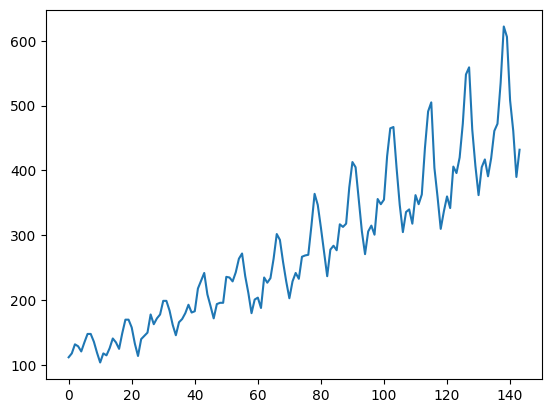

In [268]:
flights.passengers.plot()

In [269]:
flights_copy = flights.copy()

In [271]:
flights_copy.loc[np.random.randint(0, 144,20) , ["passengers"]] = np.nan

In [273]:
flights_copy.sample(20)

,year,month,passengers
45,1952,Oct,NaN
56,1953,Sep,237.0
75,1955,Apr,269.0
37,1952,Feb,180.0
40,1952,May,183.0
89,1956,Jun,374.0
115,1958,Aug,505.0
59,1953,Dec,201.0
88,1956,May,318.0
103,1957,Aug,467.0


<Axes: >

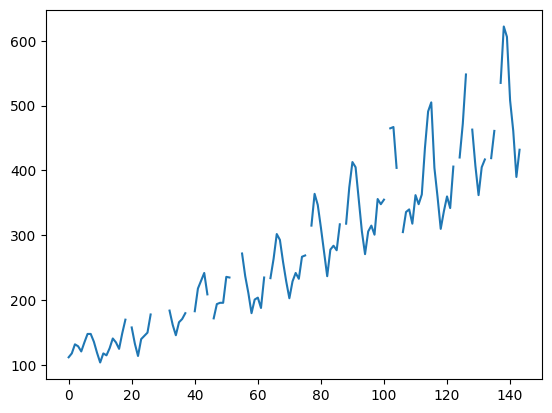

In [274]:
flights_copy.passengers.plot()

<Axes: >

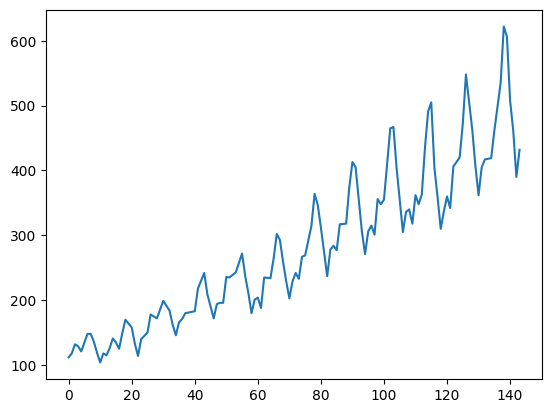

In [275]:
flights_copy["passengers"].interpolate().plot()

<Axes: >

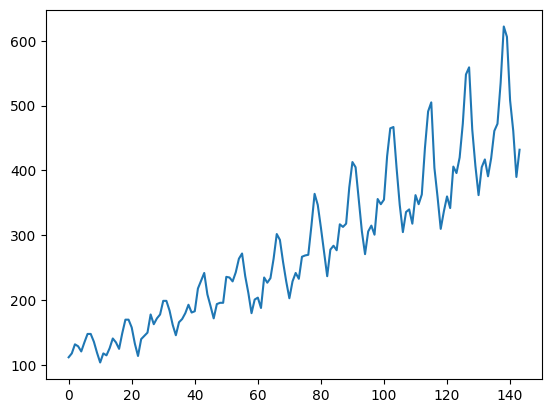

In [276]:
flights.passengers.plot()

<Axes: >

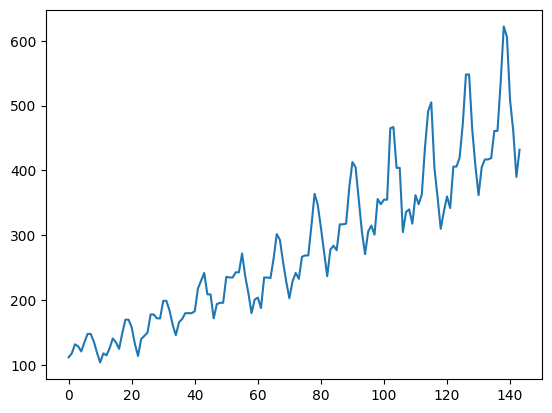

In [277]:
flights_copy["passengers"].fillna(method= "ffill").plot(kind="line")

Why was the NaN value not filled in the last index of the status column???

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________